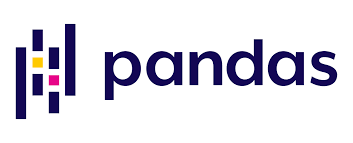

https://pandas.pydata.org/

Pandas data-manipulation capabilities are built on top of NumPy, utilizing its fast array processing, and its graphing capabilities are built on top of Matplotlib.

* "pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."

* It may be one of the most widely used tools for data munging

  * present data in nice formats
  * multiple convenient methods for filtering data
  * work with a variety of data formats (CSV, Excel, …)
  * convenient functions for quickly plotting data

* The name comes from panel data (and is also a play on python data analysis)

In [ ]:
import pandas as pd

We need to set up the Pandas basics before getting into the data viz.

## Getting your data into Python

Pandas can be used to easily import a wide variety of file types. 

![Pandas-io](pandas-io-types.png)

See [Pandas IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

We already saw an example of this last week:

In [ ]:
classics_df = pd.read_csv('classics.csv')

This week we'll use a different dataset called Anscombe's quartet.

In [ ]:
anscombe_df = pd.read_csv('anscombe.csv')

In [ ]:
anscombe_df

## Making a new dataframe

We don't just have to import data to make a new dataframe, we can use our existing data structures.

Let's do this for the MLK data

In [ ]:
# This was our previous code to get the dictionaries holding the words and word counts:

with open('i-have-a-dream.txt','r') as f:
    speech = f.read()

specialchars = '.,-!:'
for c in specialchars:
    speech = speech.replace(c,' ')

speech = speech.lower()
    
speechwordcount = {}
speechwords = speech.split(' ')
for c in speechwords:
    if c in speechwordcount.keys():
        speechwordcount[c] += 1
    else:
        speechwordcount[c] = 1        

In [ ]:
print(speechwordcount)

Let's generate two lists for words and word counts

In [ ]:
w = []
c = []
for key,val in speechwordcount.items():
    w.append(key)
    c.append(val)    

In [ ]:
print(w)
print(c)

For a dictionary with keys and values we can create a new DataFrame with

`df = pd.DataFrame(dictvariable)`

The keys will become the column labels, and the values will become the records

In [ ]:
a = {"A": [1,2,3],
     "B": ['anne','ben','carrie']
    }

a_df = pd.DataFrame(a)

print(a_df)

In [ ]:
# Let's do this with the speech

s = {'word':w,
     'count':c
    }

df = pd.DataFrame(s)

In [ ]:
df

## Basic information about the dataframe

It can be vital to do a little data exploration to see what's in your dataframe.

`head(n)` will allow you to look at the first n rows (5 by default)

In [ ]:
df.head()

In [ ]:
df.head(2)

Similarly, `tail(n)` will allow you to look at the last n rows (5 by default)

In [ ]:
df.tail()

There are several other useful dataframe attributes and methods that will allow you to get summary info:
* `columns` : column names
* `dtypes` : data types of the columns (dataframes can hold different datatypes in different columns
* `index` : information about the row indices (they don't have to be numerical)
* `shape` : the size of the dataframe in each dimension
* `info()` : a range of summary info that includes the above
* `describe()` : basic statistics about the data columns

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.index

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='all')

## Viewing data

In [ ]:
df

We can look at a specific column of a dataframe with `df[columnname]`

In [ ]:
df['word']

One must be careful with indexing elements in a dataframe.  They have both numerical- and label-based indices, but there are specific rules about how to retrieve values

In [ ]:
# This will give an error!
df[0]

In [ ]:
# this will not
df[0:1]

It's best to stick with `loc` and `iloc` for the moment to index dataframes.
* `loc` : label-based indexing (which can look numerical if the row index, for example, is a number
* `iloc` : numerical indexing

In [ ]:
# the first row
df.loc[0]

In [ ]:
# the first row, returned as a dataframe
df.loc[[0]]

In [ ]:
# the first two rows
df.loc[[0,1]]

In [ ]:
# indexing both the row and column
df.loc[0,'word']

In [ ]:
# indexing both the row and column
# and returning a dataframe
df.loc[[0],['word']]

In [ ]:
# you can use lists for the indices
df.loc[[0],['word','count']]

In [ ]:
df.loc[[10],['word','count']]

`iloc` is useful when you instead want to index numerically

In [ ]:
df.iloc[0]

In [ ]:
df.iloc[1]

In [ ]:
df.iloc[[1]]

In [ ]:
df.iloc[0:1]

In [ ]:
df.iloc[0:4]

In [ ]:
# this will give an error! you can't use a label-based index like 'word' with iloc
df.iloc[0:4,'word']

In [ ]:
# instead of referncing the column with 'word'
# iloc indexes it numerically
df.iloc[0:4,0]

In [ ]:
df.iloc[[0,1,2,3],[0]]

In [ ]:
df.iloc[0,0]

In [ ]:
df.loc[0,'word']

## Where's the row for "dream"?  Boolean indexing

It is useful to be able to get elements where certain conditions are true.

Like here, we may want to get the word count for 'dream'.  Or the word count for every word that contains 'spirit' as a substring.

This can be accomplished with boolean indexing, where the index is a True/False condition, and there is one such value for every row.

The following sets up the boolean series of True/False values for every row.

In [ ]:
df['word'] == 'five'

We can use that as the index to df, i.e., `df[condition]` to get only those rows where `condition` is True

In [ ]:
df[df['word'] == 'five']

It also works as the index when using `loc`

In [ ]:
df.loc[df['word'] == 'five']

In [ ]:
df.loc[df['word'] == 'dream']

In [ ]:
df.loc[df['word'] == 'dream','count']

In [ ]:
df['word'].str.startswith('d')

In [ ]:
df.loc[df['word'].str.startswith('d')]

In [ ]:
df.loc[df['word'].str.contains('we')]

A brief hint at how easy it is to make plots:

In [ ]:
df.loc[df['word'].str.contains('we')].plot(kind='bar',x='word')

In [ ]:
a = df.loc[df['word'].str.contains('we')]

In [ ]:
a.plot()

But I digress.

Dataframes have some very useful methods.

`sort_values` is one where we can sort all the rows by the values in one particular column.  We can therefore see more easily what the most frequently occurring words are.

In [ ]:
a.sort_values(by='count')

In [ ]:
a.sort_values(by='count',ascending=False)

In [ ]:
df = df.sort_values(by='count', ascending=False)

In [ ]:
df

We may revisit cleaning data later... here is an example where we may want to get rid of the first row, which here has index `4`

In [ ]:
df.drop(4)

Let's check to make sure it was dropped.

In [ ]:
df

No!  What happened?

`drop` returns a dataframe with the row dropped, but it doesn't change the values of the underlying dataframe.

You can either reassign the returned value to the dataframe, or use `inplace=True`

In [ ]:
df.drop(4, inplace=True)

In [ ]:
df

## Saving!

Let's do one final thing and save the dataframe to use in our later notebook.  

Pandas allows us to do that very easily with a variety of output formats.  Here is an example to write the `df` dataframe to a csv file.  We include `index=False` so that the indices (0, 1, 2, 3, 4, ...) are not also written to the csv file.

In [ ]:
df.to_csv('dreamspeechpd.csv', index=False)